Experiment 4

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

11493376/11490434 [==============================] - 0s 0us/step
X_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0

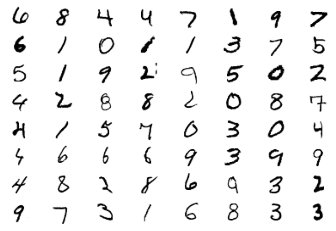

In [4]:
(x_train, y_train) , (x_test , y_test) = mnist.load_data()
x_train_drawing = x_train
print("X_train:" , x_train[0])
print("Y_train:" , y_train[0])
print("X_train shape:" , x_train.shape)
print("Y_train shape:" , y_train.shape)



image_size = 784 #28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0] , image_size)
print("After reshaping")
print("X_Train Shape:", x_train.shape)
print("X_Test Shape:", x_test.shape)


#Converting Class vectors to Binary Class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train , num_classes)

y_test = keras.utils.to_categorical(y_test , num_classes)
print(y_train.shape)
print(y_train[0])

for i in range(64):
  ax = plt.subplot(8 , 8 , i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap = 'Greys')

In [5]:
model = Sequential()
model.add(Dense(units = 25, activation = 'sigmoid' , input_shape = (image_size,)))
model.add(Dense(units = num_classes , activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = "sgd" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x_train ,  y_train, batch_size = 128 , epochs =100 , verbose = True , validation_split = .1)

Epoch 1/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2153 - accuracy: 0.9381 - val_loss: 0.2202 - val_accuracy: 0.9397
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2157 - accuracy: 0.9369 - val_loss: 0.2080 - val_accuracy: 0.9407
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2149 - accuracy: 0.9381 - val_loss: 0.2224 - val_accuracy: 0.9338
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2300 - accuracy: 0.9329 - val_loss: 0.2172 - val_accuracy: 0.9388
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2239 - accuracy: 0.9355 - val_loss: 0.2089 - val_accuracy: 0.9385
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2159 - accuracy: 0.9376 - val_loss: 0.2112 - val_accuracy: 0.9398
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.9394 - val_loss: 0.2175 - val_accuracy: 0.9370

In [8]:
loss , accuraacy = model.evaluate(x_test, y_test , verbose = True )

313/313 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9331


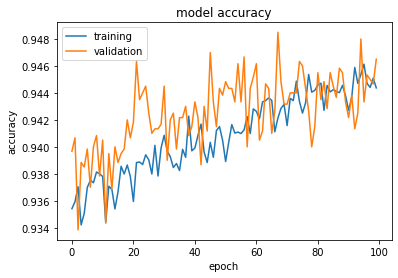

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()